<a id="topER"></a>

# What to do when you get an Exception Report for COS

## Learning Goals
<font size="4"> This Notebook is designed to walk the user (<em>you</em>) through: <b>investigating the cause of a Hubble Space Telescope (HST) Exception Report</b>. </font> 

By the end of this tutorial, you will:

- Learn how to examine `FITS` headers of your data to reveal issues with observations

- Inspect your COS data files to determine whether these were negatively impacted, anomalous, and/or degraded


## Table of Contents

**[0. Introduction](#intro)**

\- [0.1 Data Download](#download)

**[1. Inspecting the Exposure Time](#exptime)**

**[2. Reviewing the Signal-to-Noise Ratio](#snr)**

**[3. Investigating the Target Acquisition](#targacq)**

\- [3.1 `ACQ/SEARCH`](#acq-search)

\- [3.2 `ACQ/IMAGE`](#acq-image)

\- [3.3 `ACQ/PEAKXD`, `ACQ/PEAKD`](#acq-peak)

**[4. Evaluating the Wavelength Scale](#wlscale)**

**[5. Checking the Jitter](#jitter)**

\- [5.1 Inspecting the `JIF` Headers for Guiding Issues](#jif_head)

\- [5.2 Inspecting the `JIT` Table](#jit-tab)

<a id = intro></a>
# 0. Introduction
**The Cosmic Origins Spectrograph ([*COS*](https://www.nasa.gov/content/hubble-space-telescope-cosmic-origins-spectrograph)) is an ultraviolet spectrograph onboard the Hubble Space Telescope ([*HST*](https://www.stsci.edu/hst/about)) with capabilities in the near ultraviolet (*NUV*) and far-ultraviolet (*FUV*).**

**This tutorial aims to help you take the appropriate steps after you have received an exception report on your HST/COS observation.**
An exception report is generated when conditions are present that may have lead to a degredation in data quality, such as an acquisition failure or loss of lock during guiding. When this happens, you receive an email that describes what issues may have occurred during your observations and suggests initial steps to evaluating the quality of your data. The [COS Exception Report Instructions webpage](https://www.stsci.edu/hst/instrumentation/cos/documentation/exception-report-instructions) suggests a few steps to evaluating the quality of your data so that you can determine whether to file a Hubble Observation Problem Report (HOPR); this notebook will show you how to perform these steps on a variety of different examples from previous COS observations. Your data does not necessarily need to fail all of these steps before a HOPR is filed, you just need to show that there was an issue with your exposures.

**Please note that we cannot offer a complete and definitive guide to every exception report. This notebook is simply a general guide to help you understand your data and its quality. Additionally, just because you receive an exception report does not mean that there's a problem with your data, only that it should be evaluated for quality.**

### Imports

We will be using multiple libraries to retrieve and analyze data. We will use: 
* `os`, `shutil`, `Path.pathlib`, and `glob` to work with our system's directories and filepaths
* `matplotlib.pyplot` to plot our data
* `numpy` to perform analysis on our data
* `astroquery.mast` to download our COS datasets for the exercises
* `astropy.io fits` and `astropy.table Table` to read the corresponding `FITS` files
* `scipy.optimize` to fit a Gaussian when calculating the radial velocity

We recommend that you create a new `conda` environment before running this notebook. Check out the [COS Setup.ipynb](https://github.com/spacetelescope/hst_notebooks/tree/main/notebooks/COS/Setup) notebook to install `conda`. Alternatively, you can download the dependencies required to run this notebook by running the terminal command:
```
pip install -r requirements.txt
```
After you download the required dependencies, import them by running the next cell:

In [1]:
from astroquery.mast import Observations

from astropy.io import fits
from astropy.table import Table

from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

import numpy as np
from scipy import optimize

import shutil
import os
from pathlib import Path

import cos_functions as cf

import warnings
from astropy.utils.exceptions import AstropyWarning

# Ignore Astropy warnings
warnings.simplefilter('ignore', category=AstropyWarning)

<a id = download></a>
## 0.1 Data Download

We will begin by downloading all of the data for this notebook using `astroquery.mast Observations`. Details on how to download COS data can be found in our [Data Download Notebook](https://github.com/spacetelescope/hst_notebooks/tree/main/notebooks/COS/DataDl). We will be using examples from many different programs, so we will load in a `FITS` file with an `astropy.Table` of observations. We will also create a directory to store these files in, called `datapath`.

In [2]:
# Creating the folder to store our data
datapath = Path("./data/")
os.makedirs(datapath, exist_ok=True)

# Loading in the FITS table with the list of observations
observations = Table.read("./files.fits")

# Downloading the files to our data directory
Observations.download_products(
    observations,
    download_dir=str(datapath)
)

 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


 [Done]


Local Path,Status,Message,URL
str55,str8,object,object
data/mastDownload/HST/laaf2agfq/laaf2agfq_rawacq.fits,COMPLETE,None,None
data/mastDownload/HST/lbhx1cn4q/lbhx1cn4q_rawacq.fits,COMPLETE,None,None
data/mastDownload/HST/lbs304n1q/lbs304n1q_rawacq.fits,COMPLETE,None,None
data/mastDownload/HST/lda920020/lda920020_x1dsum.fits,COMPLETE,None,None
data/mastDownload/HST/lda920hyq/lda920hyq_x1d.fits,COMPLETE,None,None
data/mastDownload/HST/lda920i3q/lda920i3q_x1d.fits,COMPLETE,None,None
data/mastDownload/HST/lda920iaq/lda920iaq_x1d.fits,COMPLETE,None,None
data/mastDownload/HST/lda920iwq/lda920iwq_x1d.fits,COMPLETE,None,None
data/mastDownload/HST/ldc0c0k0q/ldc0c0k0q_rawacq.fits,COMPLETE,None,None


The function, `Observations.download_products` creates the nested directories `./data/mastDownload/HST/<ROOTNAME>`. Run the next cell to move all files from that path to `./data`:

In [3]:
mast_path = datapath / Path("mastDownload/HST/")

try:
    for obs_id_path in mast_path.iterdir():
        for file in obs_id_path.glob("*fits"):
            shutil.move(str(file), datapath / file.name)

    shutil.rmtree(mast_path.parent)

except Exception as e:
    print(f"An error occurred: {e}")

<a id = exptime></a>
# 1. Inspecting the Exposure Time

The actual exposure time can indicate issues that may have happened during the observations. If the shutter is closed, then the exposure time will be zero seconds. Additionally, if the actual exposure time is `<80%` of the planned exposure time, then that is another indicator that there may have been an issue during your observation (see [COS ISR 2024-01](https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/cos/documentation/instrument-science-reports-isrs/_documents/ISR2024-01.pdf)).

We will define a function below that can give some brief diagnostic information about the exposure time:

In [4]:
def print_exposure_summary(file):
    '''
    Print a summary of the observation, including actual/planned exptime.
    ----------
    Input: 
    str or Path file : Path to the RAWTAG file
    ----------
    Output:
    Printed exposure summary.
    '''
    with fits.open(file) as hdul:

        head0 = hdul[0].header
        head1 = hdul[1].header

        print(f'EXPOSURE SUMMARY FOR {head0["FILENAME"]}:')
        print(f'Grating: {head0["OPT_ELEM"]}')
        print(f'Cenwave: {head0["CENWAVE"]}')
        print(f'FPPOS: {head0["FPPOS"]}')
        print(f'Lifetime Position: {head0["LIFE_ADJ"]}')
        print(f'Detector: {head0["DETECTOR"]}')
        print(f'Aperture: {head0["APERTURE"]}')
        print(f'Target Name: {head0["TARGNAME"]}')
        print(f'Target Description: {head0["TARDESCR"]}')
        print(f'Extended?: {head0["EXTENDED"]}')

        if head0["MTFLAG"] == "":
            print('Moving Target?: F')
        else:
            print(f'Moving Target?: {head0["MTFLAG"]}')

        print(f'Visit: {head0["OBSET_ID"]}')
        print(f'ASN ID: {head0["ASN_ID"]}')

        print("---------------")

        print(f'Actual Exptime: {head1["EXPTIME"]}')
        print(f'Planned Exptime: {head1["PLANTIME"]}')
        print(f'Exposure Flag: {head1["EXPFLAG"]}')
        print(f'Shutter: {head0["SHUTTER"]}')
        print(f'Fine guiding lock: {head1["FGSLOCK"]}')

        print("===============")

You will want to pay attention to the actual exposure time (`EXPTIME` in the secondary header) and the planned exposure time (`PLANTIME`, also in the secondary header). If the actual exposure time is less than `80%` of the planned exposure time, then there was likely an issue with your observations and you may qualify for a repeated observation. 

Additional header keywords in the `RAWTAG` or `X1D` files to look for are the exposure flag (`EXPFLAG`, secondary header) which should be `NORMAL`, the shutter status (`SHUTTER` in the primary header) which should be `OPEN`, and the fine-guiding lock keyword (`FGSLOCK` in the secondary header -- more information is in the jitter section of this notebook) which should ideally be `FINE` (meaning the guide-star tracking was locked). 

Let's examine the header of a successful exposure:

In [5]:
successful_raw_a = datapath / "ldi707tcq_rawtag_a.fits"
successful_raw_b = datapath / "ldi707tcq_rawtag_b.fits"
successful_x1d = datapath / "ldi707tcq_x1d.fits"

print_exposure_summary(successful_raw_a)

EXPOSURE SUMMARY FOR ldi707tcq_rawtag_a.fits:
Grating: G130M
Cenwave: 1291
FPPOS: 4
Lifetime Position: 4
Detector: FUV
Aperture: PSA
Target Name: KNOT-A
Target Description: EXT-CLUSTER;EMISSION LINE NEBULA;MULTIPLE NUCLEI;NUCLEUS;STAR FO
Extended?: YES
Moving Target?: F
Visit: 07
ASN ID: LDI707030
---------------
Actual Exptime: 505.0
Planned Exptime: 505.0
Exposure Flag: NORMAL
Shutter: Open
Fine guiding lock: FINE


We can see that the actual and planned exposure times are the same, the shutter is open, and there weren't any apparent issues with guide-star tracking. Let's plot the data below:

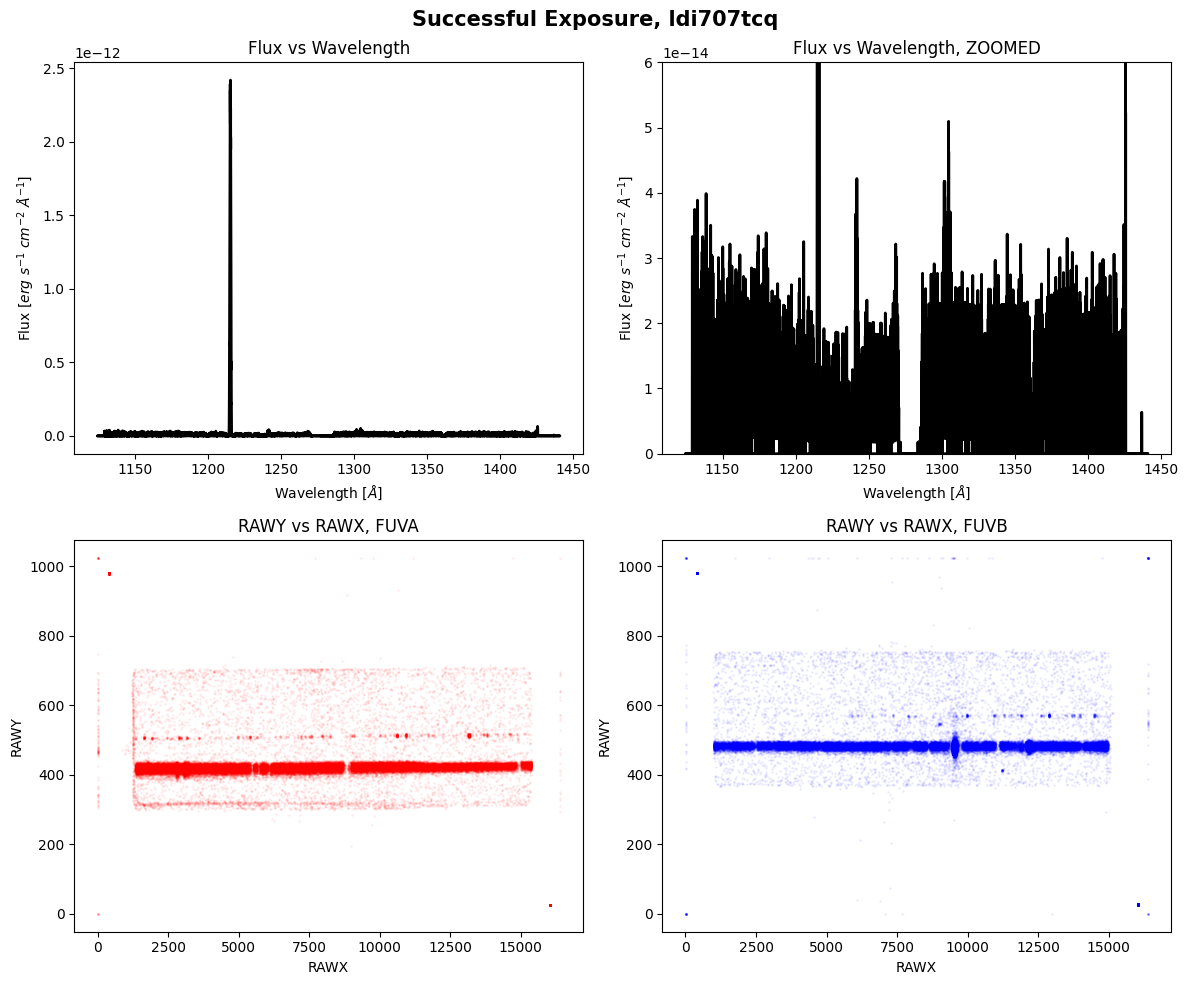

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

with fits.open(successful_x1d) as hdul:
    data = hdul[1].data
    flux = data["FLUX"].ravel()
    wl = data["WAVELENGTH"].ravel()

for i, axis in enumerate(ax[0]):
    # Plotting flux vs wavelength on top row
    axis.plot(wl, flux,
              lw=2,
              color="black")

    axis.set_xlabel(r'Wavelength [$\AA$]')
    axis.set_ylabel(r'Flux [$erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')

    if i == 0:
        axis.set_title("Flux vs Wavelength")

    else:
        axis.set_title("Flux vs Wavelength, ZOOMED")
        axis.set_ylim(0, 0.6e-13)

for i, axis in enumerate(ax[1]):
    # Plotting the counts on the detector for bottom row
    with fits.open([successful_raw_a, successful_raw_b][i]) as hdul:
        data = hdul[1].data
        axis.scatter(
            data["RAWX"],
            data["RAWY"],
            s=1,
            color=["red", "blue"][i],
            alpha=0.05
        )

    axis.set_xlabel("RAWX")
    axis.set_ylabel("RAWY")
    
    if i == 0:
        axis.set_title("RAWY vs RAWX, FUVA")

    else:
        axis.set_title("RAWY vs RAWX, FUVB")

plt.suptitle(f'Successful Exposure, {fits.getval(successful_x1d, "ROOTNAME")}',
             fontweight="bold",
             fontsize=15)

plt.tight_layout()

plt.show()

We can clearly see the spectrum and counts landing on both segments of the detectors.

We will plot another exposure in this visit that failed:

In [7]:
failed_raw_a = datapath / "leimacm3q_rawtag_a.fits"
failed_raw_b = datapath / "leimacm3q_rawtag_b.fits"
failed_x1d = datapath / "leimacm3q_x1d.fits"

print_exposure_summary(failed_raw_a)

EXPOSURE SUMMARY FOR leimacm3q_rawtag_a.fits:
Grating: G130M
Cenwave: 1291
FPPOS: 4
Lifetime Position: 4
Detector: FUV
Aperture: PSA
Target Name: SZ66
Target Description: STAR;T TAURI STAR;PRE-MAIN SEQUENCE STAR
Extended?: NO
Moving Target?: F
Visit: AC
ASN ID: LEIMAC010
---------------
Actual Exptime: 0.0
Planned Exptime: 2471.0
Exposure Flag: NO DATA
Shutter: Closed
Fine guiding lock: FINE


We can see that the actual exposure time is zero seconds, the shutter was closed, and the exposure flag has the value `NO DATA`. We will try to plot the data below, but observations with exposure times of zero cannot carry any actual information, so we will see blank plots:

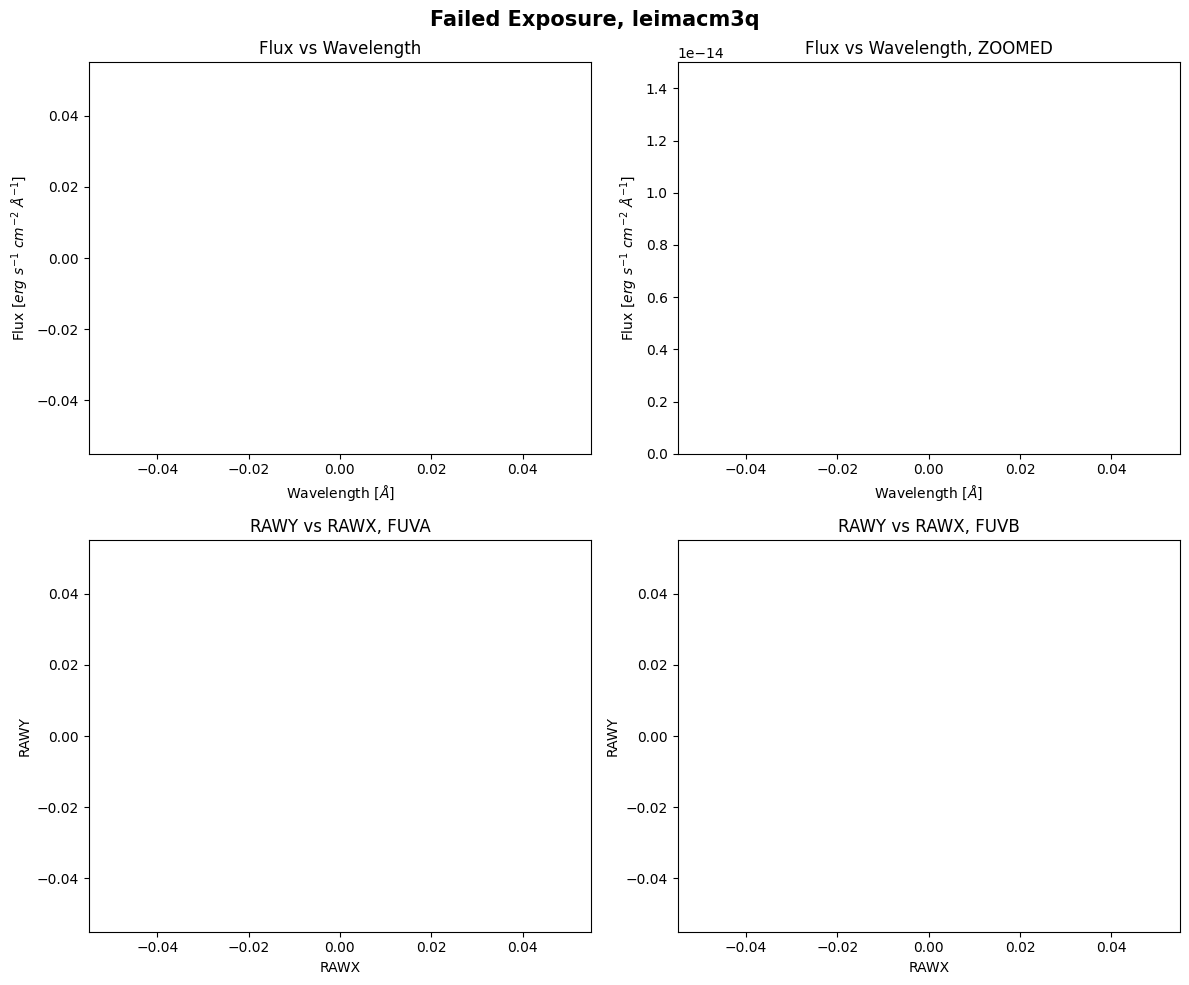

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

with fits.open(failed_x1d) as hdul:
    data = hdul[1].data
    flux = data["FLUX"].ravel()
    wl = data["WAVELENGTH"].ravel()

for i, axis in enumerate(ax[0]):
    # Plotting flux vs wavelength on top row
    axis.plot(wl, flux,
              lw=2,
              color="black")

    axis.set_xlabel(r'Wavelength [$\AA$]')
    axis.set_ylabel(r'Flux [$erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')

    if i == 0:
        axis.set_title("Flux vs Wavelength")

    else:
        axis.set_title("Flux vs Wavelength, ZOOMED")
        axis.set_ylim(0, 1.5e-14)

# Plotting the counts on the detector for bottom row
with fits.open(failed_raw_a) as hdul:
    data = hdul[1].data
    ax[1][0].scatter(
        data["RAWX"],
        data["RAWY"],
        s=1,
        color="red"
    )

for i, axis in enumerate(ax[1]):
    # Plotting the counts on the detector for bottom row
    with fits.open([failed_raw_a, failed_raw_b][i]) as hdul:
        data = hdul[1].data
        axis.scatter(
            data["RAWX"],
            data["RAWY"],
            s=1,
            color=["red", "blue"][i],
            alpha=0.05
        )

    axis.set_xlabel("RAWX")
    axis.set_ylabel("RAWY")
    
    if i == 0:
        axis.set_title("RAWY vs RAWX, FUVA")

    else:
        axis.set_title("RAWY vs RAWX, FUVB")

plt.suptitle(f'Failed Exposure, {fits.getval(failed_x1d, "ROOTNAME")}',
             fontweight="bold",
             fontsize=15)

plt.tight_layout()

plt.show()

As expected, there is no data to plot.

<a id = snr></a>
# 2. Reviewing the Signal-to-Noise Ratio

You will want to review the `X1DSUM` and constituent `X1D` files for your observation to see if any of the `X1D` files have dramatically lower (or zero) counts compared to the other `X1D` files. If the signal-to-noise ratio (SNR) of your `X1DSUM` file is sufficient for your science even with the problematic `X1D`, the COS team recommends that you file a [Hubble Observation Problem Report](https://www.stsci.edu/hst/observing/post-observation/reporting-problems) (HOPR) and note that you are not requesting a repeat of the observation. This is so the observation is flagged in MAST for potential future investigators.

COS is a photon-counting instrument, so SNR calculations can be simplified compared to other instruments. Information about calculating the SNR of COS data can be found in [Chapter 7.3](https://hst-docs.stsci.edu/cosihb/chapter-7-exposure-time-calculator-etc/7-3-sensitivity-count-rate-and-signal-to-noise) of the COS Instrument Handbook. The SNR is directly proportional to the square-root of the exposure time. In the COS notebook on [Viewing COS Data](https://github.com/spacetelescope/hst_notebooks/blob/main/notebooks/COS/ViewData/ViewData.ipynb), we use a simplified equation for the SNR:

$$\dfrac{Signal}{Noise} = \sqrt{C \times t} = \sqrt{Gross\ Counts}$$

This equation is a simplification, and may not be ideal for all datasets. We will plot the SNR for a good observation, and an observation with failed exposures. We will use the `cos_functions.py` file from the [Viewing COS Data Notebook](https://github.com/spacetelescope/hst_notebooks/blob/main/notebooks/COS/ViewData/ViewData.ipynb) to bin the data to a given resolution element (also known as _resel_).

We will begin by plotting an example of an `X1DSUM` and its constituent `X1D` files with no issues in any of the exposures:

In [9]:
def plot_snr(filelist, quality):
    '''
    Plot the SNR of the X1D files and the X1DSUM.
    SNR is calculated using simplified equation:
        SNR = sqrt(GCOUNTS)
    ----------
    Input:
    [str] filelist : A list of the x1d/x1dsum filepaths for an observation
    str quality : Is this a good or bad observation? Just used in title.
    ----------
    Output:
    SNR is plotted.
    '''
    plt.Figure(figsize=(12, 10))

    for file in sorted(filelist):
        with fits.open(file) as hdul:
            if "x1dsum" in file:
                exptime = hdul[1].header["EXPTIME"]
                label = f"X1DSUM - {exptime} sec"

            else:
                fppos = hdul[0].header["FPPOS"]
                exptime = hdul[1].header["EXPTIME"]
                rootname = hdul[0].header["ROOTNAME"]

                label = f"{rootname}, FPPOS {fppos} - {exptime} sec"

        tab = Table.read(file)
        wavelength = tab["WAVELENGTH"].ravel()
        
        snr_est = cf.estimate_snr(
            tab,
            verbose=False,
            bin_data_first=True,
            weighted=True,
        )

        plt.plot(np.concatenate([snr_est[1][1][0], snr_est[1][0][0]], axis=0), 
                 np.concatenate([snr_est[1][1][1], snr_est[1][0][1]], axis=0),
                 label=label,
                 lw=1,
                 alpha=0.6)
        
    if quality == "Bad":
        plt.hlines(8, min(wavelength), max(wavelength),
                   linestyles="--",
                   colors="red",
                   label="Required SNR from Phase II")

        plt.ylim(0, 15)

    plt.ylabel("SNR")
    plt.xlabel("Wavelength")
    plt.title(f"SNR vs Wavelength, {quality} Observation")
    plt.legend()
    plt.show()

function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6


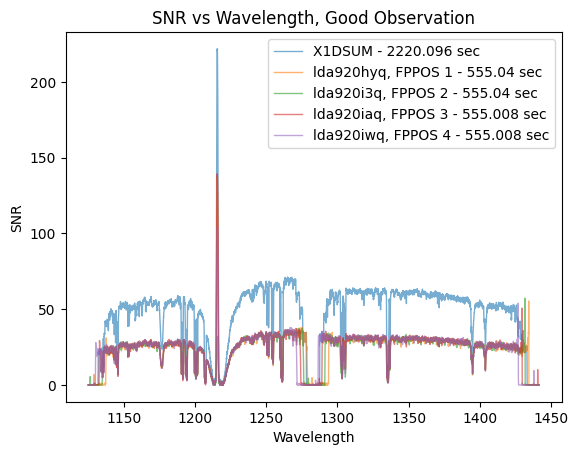

In [10]:
filelist = [str(file) for file in datapath.glob("*lda920*")]
plot_snr(filelist, "Good")

The SNR of the combined `X1DSUM` file is roughly twice that of the individual `X1D` files. This is expected because the `X1DSUM` file is the coadd of the four `X1D` files, and SNR scales by $\sqrt{Counts} \propto \sqrt{Exposure\ Time}$. This program requires that the combined SNR be greater than `30`, and we can see that this requirement has been satisfied as the `X1DSUM` SNR is `~50`. There likely was not an issue with any of the individual exposures because the SNR of all `X1D` files is roughly the same.

Let's plot a problematic observation now. This visit suffered from issues with the guide-star acquisition.

function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6
function `bin_by_resel` is binning by 6


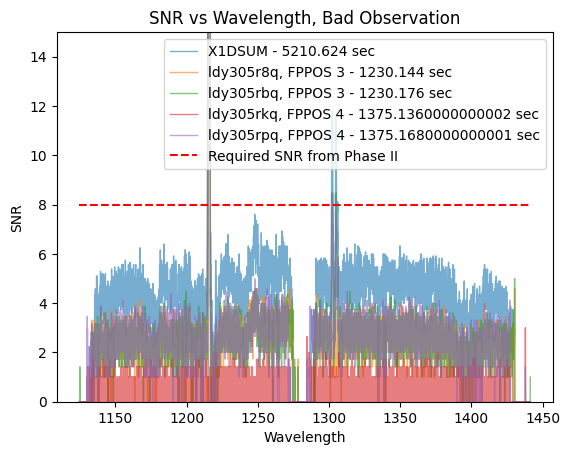

In [11]:
filelist = [str(file) for file in datapath.glob("*ldy305*")]
plot_snr(filelist, "Bad")

In their Phase II, the PI requires a SNR of at least `8` at `1250Å` to accurately do their science. We can see that the SNR of the `X1DSUM` is around `6`, therefore not meeting the science requirement. One of the observations taken at `FPPOS 4` (`ldy305rkq`) has a SNR of almost zero, thus that observation does not add much signal (if any) to the SNR of the `X1DSUM` file.

<a id = targacq></a>
# 3. Investigating the Target Acquisition

Proper centering of the target within the COS aperture is essential for high-quality data. The COS team recommends for almost all cases that users utilize at least one form of target acquisitions to center the target; a target acquisition is required at least once per visit. More information on target acquisitions can be found in [Chapter 8.1 of the COS Instrument Handbook](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-1-introduction).

There are four different target acquisition modes for COS:
| Type of Acquisition | Steps | Notes |
|----------|----------|----------|
|    [`ACQ/SEARCH`](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-3-acq-search-acquisition-mode)     |    The instrument moves in a spiral pattern to cover a grid from `2x2` steps up to `5x5`steps in size. A 2D array of counts at each step-point is constructed and the Flight Software calculates the centroid of the target using one of three different algorithms that use the flux weight.     |    A single `ACQ/SEARCH` provides a centering accuracy of `0.3"` only `75%` of the time, so there may be additional acquisitions necessary depending on your flux and wavelength requirements.     |
|    [`ACQ/IMAGE`](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-4-acq-image-acquisition-mode)     |    The COS NUV detector takes an image of the target field, moves the telescope to center the target, and then takes an additional NUV image to confirm centering. This is the typical means of target acquisition for COS.     |    When using the PSA for the acquisition, users should aim for a `SNR > 20`; for BOA, this should be `SNR > 30`.     |
|    [`ACQ/PEAKXD`](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-5-acq-peakxd-acquisition-mode)     |    **For NUV `ACQ/PEAKXD`:** The wavecal lamp is flashed and the spectrum is collapsed in the dispersion direction and the centroids of the spectrum and the target aperture are calculated. The target cross-dispersion (XD) location is assumed to be the median of the collapsed wavecal spectrum; the telescope is slewed in the XD direction to center the target to this location. <br>**For FUV `ACQ/PEAKXD`:** The FUV algorithm is similar to `ACQ/SEARCH` but instead of step-points in a spiral shape, the spacecraft is moved linearly in the XD direction. The centroid of the target is calculated using the array of counts for each step-point and the telescope is moved in the XD direction.   |    For both NUV and FUV `ACQ/PEAKXD` acquisitions, the COS team recommends `SNR > 40` for all dispersed-light target acquisition exposures. <br>`ACQ/PEAKXD` *always* precedes `ACQ/PEAK` acquisitions; one cannot happen without the other.     |
|    [`ACQ/PEAK`](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-6-acq-peakd-acquisition-mode)     |    This algorithm works similarly to `ACQ/SEARCH` but instead of steps in a spiral shape, the spacecraft is moved linearly in the along-dispersion (AD) direction. The centroid of the target is calculated using each step-point array and the telescope is moved to center the target in the aperture in the AD direction.     |    This acquisition always happens after `ACQ/PEAKXD`.     |

We can analyze the quality of the target acquisition for an observation by looking at the `RAWACQ` files. We will go through a few examples of evaluating the acquisition for some of these modes. More information about evaluating target acquisitions can be found in [Chapter 5.2](https://hst-docs.stsci.edu/cosdhb/chapter-5-cos-data-analysis/5-2-evaluating-target-acquisitions-and-guiding) of the COS Data Handbook and in [COS ISR 2010-14](https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/cos/documentation/instrument-science-reports-isrs/_documents/ISR2010_14.pdf).

<a id = acq-search></a>
## 3.1 `ACQ/SEARCH`

As mentioned above, using the `ACQ/SEARCH` method for centering moves the instrument `N` steps in a spiral pattern and calculates the centroid of the target by analyzing the counts at each of these steps (also known as a dwell-point). The `RAWACQ` file of an `ACQ/SEARCH` acquisition will contain a header and a binary data table with four different columns, and `N*N` number of rows, one for each dwell point. The columns `DISP_OFFSET` and `XDISP_OFFSET` correspond to the `X` and `Y` locations of the specific dwell point, in arcseconds, relative to the initial pointing position. The `COUNTS` column is the number of counts for that dwell point. To check if you have a successful `ACQ/SEARCH` acquisition, you can plot the counts of each dwell point and compare the dwell point with the maximum number of counts to the commanded slew position. The coordinates for the commanded slew position are in the header of the `RAWACQ` file, in the keywords `ACQSLEWX` and `ACQSLEWY`.

We will define a function to plot the `ACQ/SEARCH` table, and we will plot the table of a successful and unsuccessful acquisition.

In [12]:
def plot_acq_search(file):
    '''
    Plot the ACQ/SEARCH table, to help assess acquisition data quality.
    The commanded slew and the dwell point with highest counts should be 
    the same for a successful acquisition.
    ----------
    Input: 
    str or Path file : Path to the ACQ/SEARCH exposure.
    ----------
    Output:
    Plot with counts at each dwell point for the exposure.
    Commanded slew point is also plotted.
    '''
    # Reading in the file's data
    data = Table.read(file)

    # The unique dwell points in DISP/XDISP grid
    disp_unique = np.unique(data["DISP_OFFSET"])
    xdisp_unique = np.unique(data["XDISP_OFFSET"])

    # Empty table for dwell points' counts
    dwell_table = np.zeros((len(disp_unique), len(xdisp_unique)))

    # Filling the table with count values
    for row in data:

        # Getting the index for the grid
        i_disp = np.where(disp_unique == row["DISP_OFFSET"])[0][0]
        i_xdisp = np.where(xdisp_unique == row["XDISP_OFFSET"])[0][0]

        # Adding counts value to grid location
        dwell_table[i_disp, i_xdisp] = row["COUNTS"]

    # For the plot:
    # The "bounding box" of image, plus a little extra so nothing is cut off
    # In form (LEFT, RIGHT, 
    #          BOTTOM, TOP)
    box = (disp_unique[0]-0.5, disp_unique[-1]+0.5, 
           xdisp_unique[0]-0.5, xdisp_unique[-1]+0.5)

    plt.figure(figsize=(10, 8))

    # Plotting the dwell point grid
    plt.imshow(
        dwell_table,
        origin="lower",
        aspect="auto",
        extent=box
    )

    plt.colorbar(label="Counts")

    # Getting coordinates for commanded slew
    xslew = fits.getval(file, "ACQSLEWX")
    yslew = fits.getval(file, "ACQSLEWY")

    # Putting commanded slew position on plot
    plt.scatter(
        xslew,
        yslew,
        label="Commanded Slew Location",
        marker="*",
        color="red",
        s=250
    )

    # Adding formatting
    plt.xlabel("DISP_OFFSET (arcsec)")
    plt.ylabel("XDISP_OFFSET (arcsec)")

    scansize = fits.getval(file, "SCANSIZE")

    plt.title(f'ACQ/SEARCH of {fits.getval(file, "ROOTNAME")}, SCAN-SIZE = {scansize}',
              fontweight="bold")
    
    plt.grid(False)
    plt.legend()
    
    plt.show()

Let's plot a successful target acquisition:

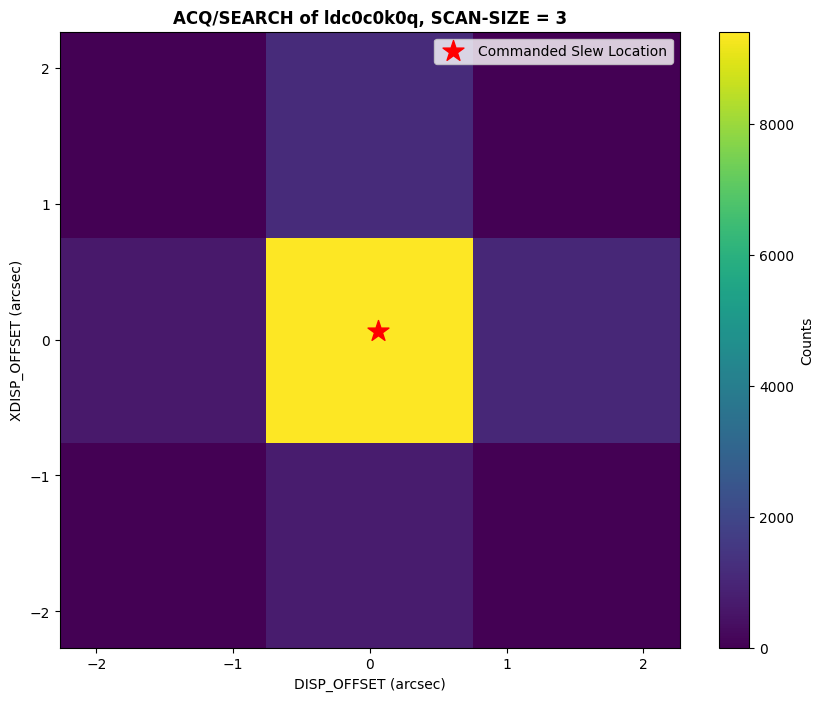

In [13]:
plot_acq_search(datapath / "ldc0c0k0q_rawacq.fits")

As we can see above, the dwell point with the maximum counts is not at the edge of the scan area, and the commanded slew is consistent with the dwell point with the highest counts. 

An example of a failed `ACQ/SEARCH` acquisition can be seen below. For this observation, there was an issue with the guide-star acquisition, and the COS shutter closed as a result. 

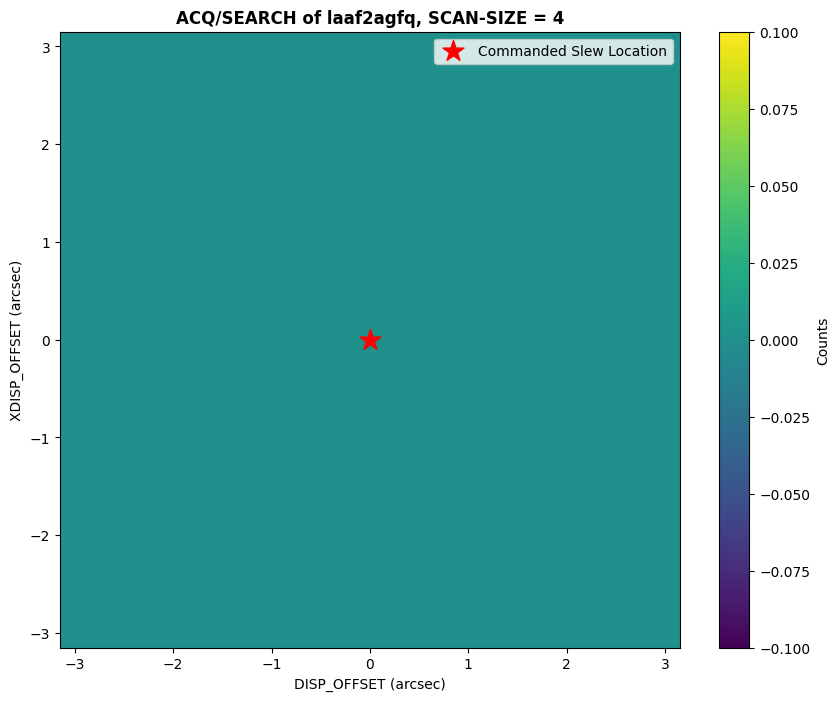

In [14]:
plot_acq_search(datapath / "laaf2agfq_rawacq.fits")

We can see in the plot above that the counts across the whole scan are zero, which is expected since the shutter was closed for the acquisition.

<a id = acq-image></a>
## 3.2 `ACQ/IMAGE`

For an `ACQ/IMAGE` acquisition, two images are taken with the NUV detector. The first one is taken after the initial HST pointing. The flight software calculates the movement needed to center the object to the center of the aperture, centers the object, and then takes a confirmation image. The initial and confirmation images can be found in the `ACQ/IMAGE` `RAWACQ` file. There are a total of six images (and one primary header) in the `FITS` file. Three for the initial image (one is the image, another is `ERR` and the third is `DQ` flagged data), and three for the confirmation image (`ERR` and `DQ`).

In [15]:
def plot_acq_image(file):
    '''
    Plot the initial and confirmation acquisition image of an ACQ/IMAGE _rawacq
    file. The expected and measured centroids of the target are also plotted.
    ----------
    Input:
    str or Path peakd : Path to the ACQ/IMAGE exposure.
    ----------
    Output:
    Initial and confirmation image are plotted with a colorbar and expected/measured centroids.
    '''
    fig, (initial, confirm) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    with fits.open(file) as hdul:
        header = hdul[0].header

        print(f'Exposure time for initial image: {hdul[1].header["EXPTIME"]} seconds')
        print(f'Exposure time for confirmation image: {hdul[4].header["EXPTIME"]} seconds')

        # Plotting the initial image
        initial_im = initial.imshow(hdul[1].data, 
                                    vmin=0, 
                                    vmax=0.1, 
                                    aspect="auto")

        initial.plot(
            header["ACQPREFX"],
            header["ACQPREFY"],
            "*",
            label="Desired Centroid",
            ms=15,
            alpha=0.8,
            color="green"
        )

        initial.plot(
            header["ACQCENTX"],
            header["ACQCENTY"],
            "o",
            label="Initial Centroid",
            ms=10,
            alpha=0.6,
            color="red"
        )

        conf_im = confirm.imshow(hdul[4].data,
                                 vmin=0, 
                                 vmax=0.1, 
                                 aspect="auto")

        confirm.plot(
            header["ACQCENTX"],
            header["ACQCENTY"],
            "o",
            label="Measured Center",
            ms=10,
            alpha=0.6,
            color="red"
        )

    initial.set_title("Initial Acquisition Image")
    confirm.set_title("Confirmation Acquisition Image")

    title = f'Initial and Confirmation Image for {fits.getval(file, "ROOTNAME")}, ACQ/IMAGE'
        
    plt.suptitle(title, fontweight="bold")

    fig.colorbar(initial_im, label="Counts")
    fig.colorbar(conf_im, label="Counts")

    initial.legend()
    confirm.legend()

    plt.show()

We will plot a successful `ACQ/IMAGE` acquisition; we will see the measured flight-software (FSW) centroid in the location of the area of the detector with the highest number of counts (which is the location of the target).

Exposure time for initial image: 76.0 seconds
Exposure time for confirmation image: 76.0 seconds


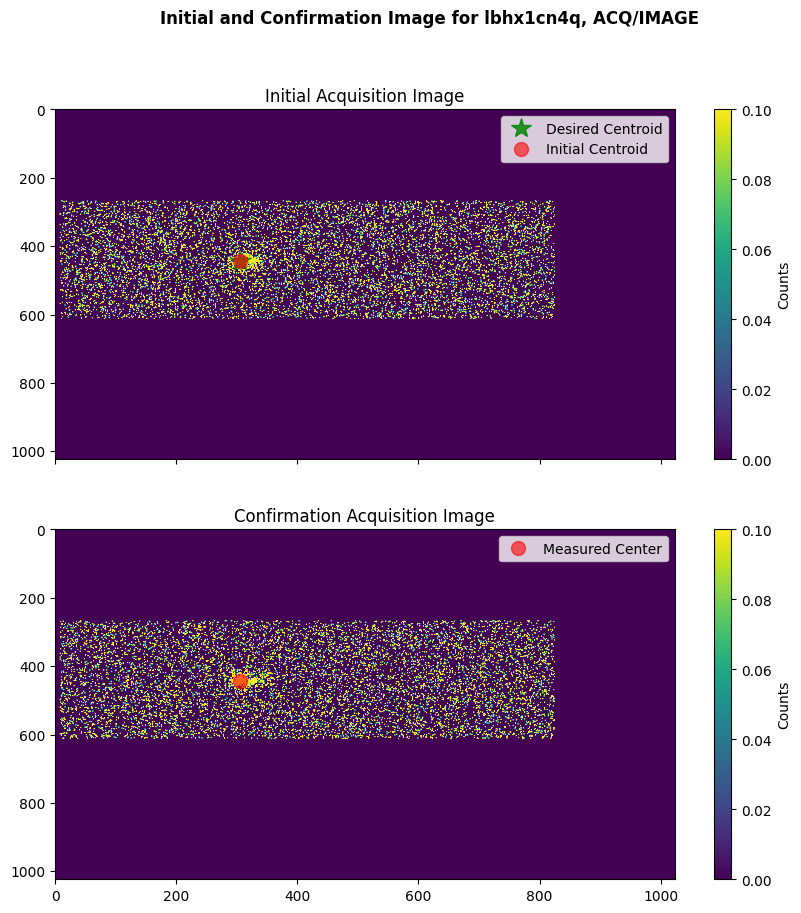

In [16]:
plot_acq_image(datapath / "lbhx1cn4q_rawacq.fits")

We will also plot an example of a failed `ACQ/IMAGE` acquisition, where the COS shutter closed before the confirmation acquisition image was taken due to a guide-star acquisition failure. 

Exposure time for initial image: 252.0 seconds
Exposure time for confirmation image: 0.0 seconds


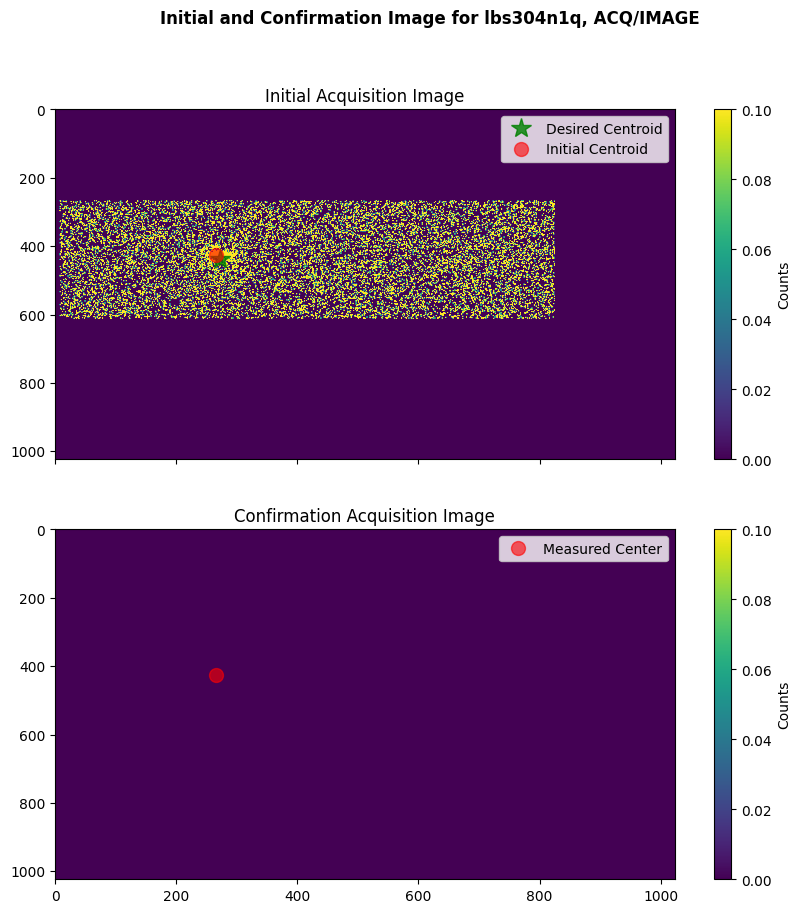

In [17]:
plot_acq_image(datapath / "lbs304n1q_rawacq.fits")

<a id = acq-peak></a>
## 3.3 `ACQ/PEAKXD`, `ACQ/PEAKD`

`ACQ/PEAKXD` and `ACQ/PEAKD` exposures can be taken after dispersed light acquisitions to further improve the centering of your target. The `ACQ/PEAKXD` exposure is taken before the `ACQ/PEAKD` exposure. We can check the quality of these acquisitions in a similar manner as to the `ACQ/SEARCH` example. Similarly to `ACQ/SEARCH` files, the `ACQ/PEAKD` files have data for the dwell points and their respective counts in the `Ext 1` header. In a successful exposure, the dwell point with the maximum number of counts is in the center of the scan and the slew offset header keyword (`ACQSLEWX`) is in this location as well. 

We will define a function to plot a `ACQ/PEAKXD`/`ACQ/PEAKD` exposure, and then plot an example of a successful exposure.

In [18]:
def plot_peakdxd(peakd, peakxd):
    '''
    Plot the ACQ/PEAKD and ACQ/PEAKXD tables, and mark the zero offset location.
    In a successful exposure, the dwell point with the max counts will be
    at an offset of 0.0. 

    ** Note that the vmin and vmax (colorbar scale range) is hardcoded to aid in **
       visualization of the bad data's plot.
    ----------
    Input: 
    str or Path peakd : Path to the ACQ/PEAKD exposure.
    str or Path peakxd : Path to the ACQ/PEAKXD exposure.
    ----------
    Output:
    Plot with counts at each dwell point for the exposures.
    '''
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))

    # First is the XD acq
    peakxd_table = Table.read(peakxd)

    cxd = ax[0].scatter(
        peakxd_table["XDISP_OFFSET"],
        peakxd_table["DWELL_POINT"],
        c=peakxd_table["COUNTS"],
        s=2000,
        marker="s",
        cmap="viridis",
        vmin=0,
        vmax=2750
    )

    # Second is the AD acq
    peakd_table = Table.read(peakd)

    cd = ax[1].scatter(
        peakd_table["DISP_OFFSET"],
        peakd_table["DWELL_POINT"],
        c=peakd_table["COUNTS"],
        s=2000,
        marker="s",
        cmap="viridis",
        vmin=0,
        vmax=2750
    )

    for subplot, column in zip(ax, ["XDISP_OFFSET", "DISP_OFFSET"]):

        subplot.set_xlabel(column,
                           fontweight="bold")
        subplot.set_ylabel("DWELL POINT",
                           fontweight="bold")

        subplot.axvline(0, 0, 6,
                        linestyle="dashed",
                        lw=2,
                        color="black",
                        label="Zero Offset")
        
        subplot.legend(loc="center right")

    cbxd = fig.colorbar(cxd, ax=ax[0])
    cbxd.set_label("Counts",
                   fontweight="bold")
    
    cbd = fig.colorbar(cd, ax=ax[1])
    cbd.set_label("Counts",
                  fontweight="bold")

    ax[0].set_title(f'PEAKXD for {fits.getval(peakxd, "ROOTNAME")}',
                    fontweight="bold")
    ax[1].set_title(f'PEAKD for {fits.getval(peakd, "ROOTNAME")}',
                    fontweight="bold")
    
    plt.tight_layout()
    plt.show()

Now we will plot a successful `ACQ/PEAKD` & `ACQ/PEAKXD` acquisition using the respective `RAWACQ` files. Note how the dwell points with the highest number of counts are in the center for both acquisitions.

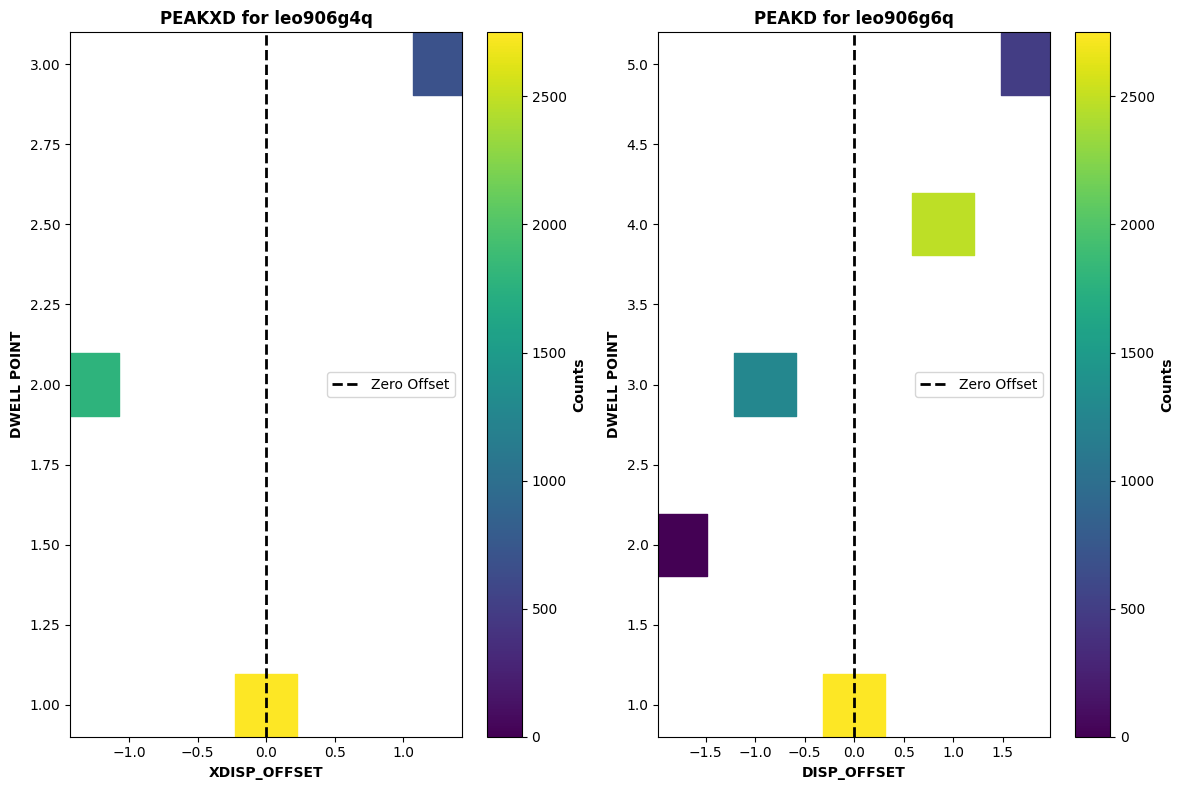

In [19]:
peakd = datapath / "leo906g6q_rawacq.fits"
peakxd = datapath / "leo906g4q_rawacq.fits"
plot_peakdxd(peakd, peakxd)

And now we will plot an unsuccessful acquisition, where the shutter was closed:

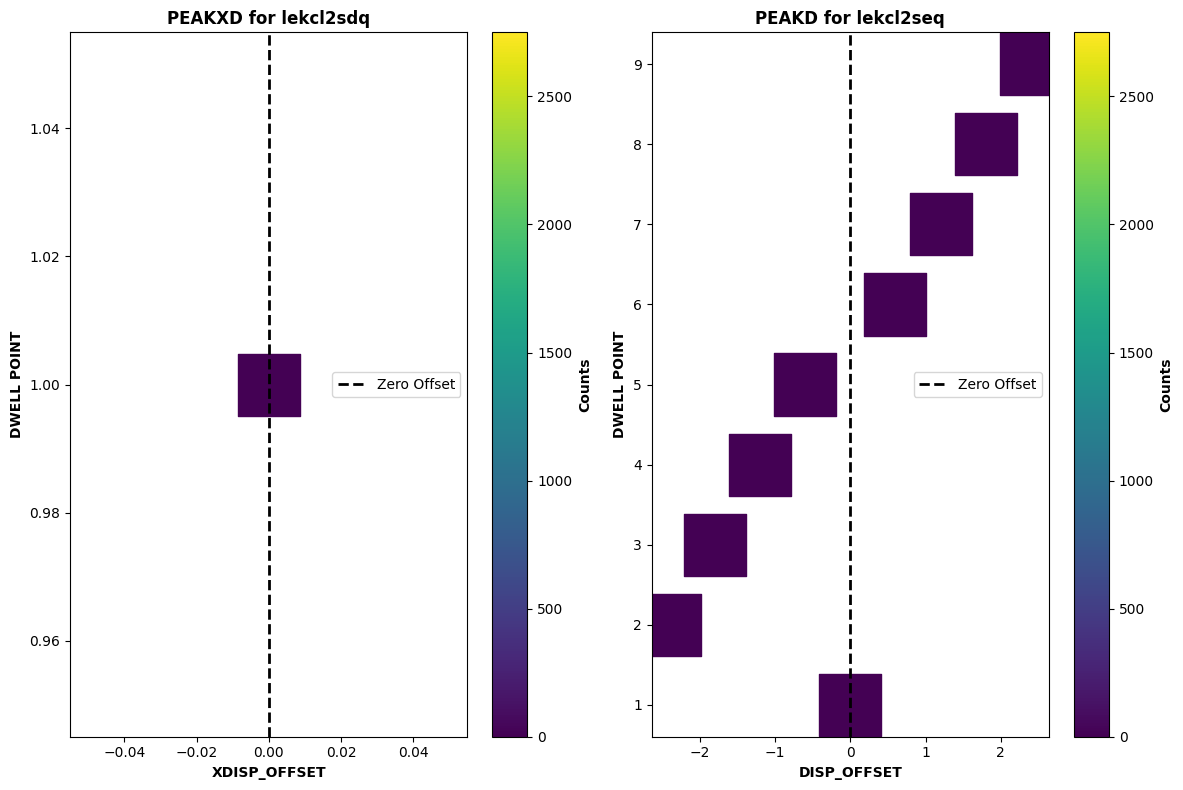

In [20]:
peakd = datapath / "lekcl2seq_rawacq.fits"
peakxd = datapath / "lekcl2sdq_rawacq.fits"
plot_peakdxd(peakd, peakxd)

Similar to the `ACQ/SEARCH` example, we can see that the counts across the entire scan are zero. Since the shutter was closed, there was an issue with the observation.

<a id = wlscale></a>
# 4. Evaluating the Wavelength Scale

If your target is not centered well in the aperture, then you can experience issues with the wavelength scale, i.e. there may be an offset in the dispersion direction. The minimum wavelength accuracy for each COS mode is listed in [Chapter 8.8](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-8-centering-accuracy-and-data-quality) of the COS Instrument Handbook. If a large enough offset is apparent between the observed and expected line positions of your target, then you will want to check the target's centering. 

We will go through an example of an observation with a poor wavelength scale. This observation was part of the [ULLYSES](https://ullyses.stsci.edu/index.html) project, and observed the [T-Tauri Star](https://en.wikipedia.org/wiki/T_Tauri_star) [V510-Ori](http://simbad.cds.unistra.fr/simbad/sim-basic?Ident=V510+Ori&submit=SIMBAD+search). We will calculate the radial velocity of the target using the `CIV` lines at `1548.19 Å`. 

To calculate the radial velocity, we will fit a curve to the `CIV` line of the `X1DSUM` `G160M` file, and compare the peak of this curve with the expected location of the `CIV` line. We will then use the equation below to calculate the radial velocity:

$ v_r = c \left( \frac{\lambda - \lambda_0}{\lambda_0} \right) $

Where:
- $ v_r $ is the radial velocity,
- $ c $ is the speed of light ($ \approx 2.99 * 10^5 $ km/s),
- $ \lambda $ is the observed wavelength of the spectral line,
- $ \lambda_0 $ is the rest wavelength of the spectral line.

We will first define a function that will fit a Gaussian to our emission line:

In [21]:
def fit_gaussian(wavelength, amplitude, mean, stddev):
    '''
    Fit a Gaussian to the data.
    Gaussian is defined as:
    f(x) = c + amplitude * np.exp(-(((wavelength - mean) / stddev)**2)/2)
    ----------
    Input:
    arr wavelength : Data of the independent variable (wl in our context)
    float amplitude : Amplitude of Gaussian. Represents the peak of the data
    float mean : Mean wl of Gaussian. Represents central wavelength of feature
    float stddev : Standard deviation of Gaussian. Represents function's width
    ----------
    Output:
    The value of flux at each wavelength using the fit.
    '''
    # An estimate of the continuum flux value
    c = 1.1e-15
    return c + amplitude * np.exp(-(((wavelength - mean) / stddev)**2)/2)

We will now use `scipy.optimize` `curve_fit` to fit this function to the `CIV` line of the `X1DSUM`. We will do our fit between the wavelength range `1546 - 1550 Å`.

The CIV peak is fitted to be 1547.465 Å


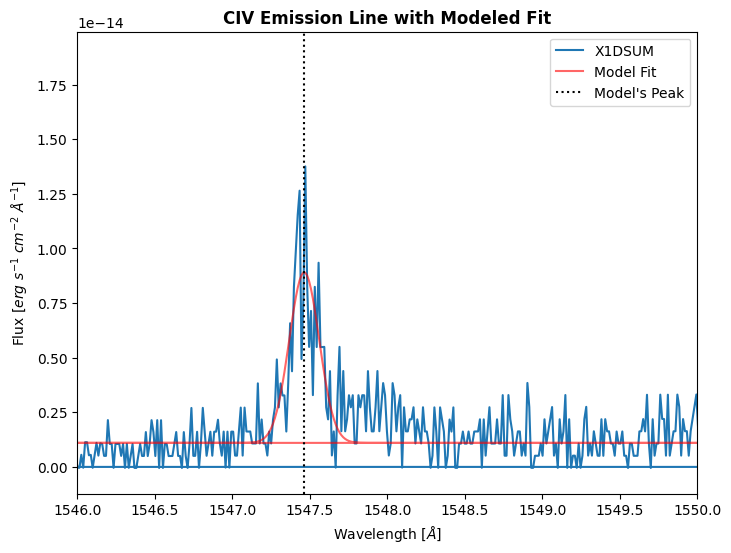

In [22]:
# Extracting the X1DSUM file's data
with fits.open(datapath / "le9i4d020_x1dsum.fits") as hdul:
    wavelength = hdul[1].data["WAVELENGTH"].ravel()
    flux = hdul[1].data["FLUX"].ravel()

# Getting the indicies within the wavelength range
indicies = np.where((wavelength >= 1546) & (wavelength <= 1550))

trimmed_flux = flux[indicies]
trimmed_wl = wavelength[indicies]

# We need to make an initial guess for the parameter values
# The array is in form [PEAK OF GAUSSIAN, CENTRAL WAVELENGTH, WIDTH OF LINE]
p0 = [1.2e-14, 1547.6, 0.008]

popt, _ = optimize.curve_fit(fit_gaussian,
                             trimmed_wl,
                             trimmed_flux,
                             p0)

print(f"The CIV peak is fitted to be {np.round(popt[1], 3)} Å")

# Plotting the emission feature and our fit
plt.figure(figsize=(8, 6))

# Plotting the actual data
plt.plot(
    wavelength,
    flux,
    label="X1DSUM"
)

# Plotting our fit
plt.plot(
    wavelength,
    fit_gaussian(wavelength, *popt),
    label="Model Fit",
    color="red",
    alpha=0.6
)

# Adding vertical lines to show fitted "peak"
plt.axvline(popt[1],
            label='Model\'s Peak',
            color="black",
            linestyle="dotted")

plt.xlim(1546, 1550)
plt.legend()

plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'Flux [$erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.title("CIV Emission Line with Modeled Fit",
          fontweight="bold")

plt.show()

We will then use the equation defined earlier to calculate the radial velocity. The rest wavelength for `CIV` is `1548.19 Å`.

In [23]:
# Speed of light (in km/s)
c = 2.99e5

# Getting the observed wavelength of our HLSP
observed_wavelength = popt[1]

# Rest wavelength of CIV
rest_wavelength = 1548.19

v_r = c * ((observed_wavelength - rest_wavelength) / rest_wavelength)
v_r = np.round(v_r, 2)

print(f"The radial velocity of the target is {v_r} km/s")

The radial velocity of the target is -140.11 km/s


The literature value of the radial velocity for this target is [`~33.3 km/s`](http://simbad.cds.unistra.fr/simbad/sim-basic?Ident=V510+Ori&submit=SIMBAD+search). There is a `> 150 km/s` difference in the radial velocity, which is far above the minimum accuracy of `+/- 15 km/s`, indicating that there was likely an issue with the target centering during this visit. Since this dataset passed all other data quality checks, the ULLYSES team applied a manual shift which corrected the data.

_Note: If your observation has a slight shift, and passes other data quality checks, then you can manually apply a shift to correct your data. Details of this are in [Chapter 5.3.2](https://hst-docs.stsci.edu/cosdhb/chapter-5-cos-data-analysis/5-3-working-with-extracted-spectra) of the COS Data Handbook, and there is a tutorial in the [HASP notebook repository](https://github.com/spacetelescope/hst_notebooks/tree/main/notebooks/HASP) as well._

<a id = jitter></a>
# 5. Checking the Jitter

Jitter is caused by spacecraft motion during the observation. This can be due to a variety of reasons, including micro-meteor impact or a day-night transition. The jitter files contain information about the performance of the Pointing Control System (PCS) and the Fine Guidance Sensors (FGS) during your observation; they are produced by the Engineering Data Processing System (EDPS), which is software that analyzes the HST spacecraft telemetry. There are two relevant jitter files that are produced: one is the `JIT` table, which is a table that contains 3-second average pointing data, and the `JIF` file, which is a 2D histogram of the `JIT` table. These files are produced for all COS science exposures (with the exception of acquisitions). For more information on jitter files, check out [Chapter 5.1](https://hst-docs.stsci.edu/hstdhb/5-observation-logs/5-1-observation-log-files) of the HST Data Handbook. 

We will walk through analyzing the `JIF` and `JIT` files for two different datasets: one dataset with a low amount of jitter and one with a high amount of jitter.

<a id = jif_head></a>
## 5.1 Inspecting the `JIF` Headers for Guiding Issues

We can first take a look at the headers of the `JIF` file, which can provide us with information about the guide-star lock; this information is in the primary header, under the `Problem Flags and Warnings` section. Additionally, in the secondary header, there is information about the commanding guiding mode. There are three modes, `FINE LOCK`, `FINE LOCK/GYRO`, and `GYRO`. If there was a problem with the observation guiding, then the secondary header keywords, `GUIDECMD` and `GUIDEACT`, will not match. These keywords are the "command guiding mode" and the "actual guiding mode", respectively. If the `GUIDEACT` keyword value is `FINE LOCK/GYRO`, or `GYRO`, then there may have been a problem with the guide-star acquisition and the target may have moved out of the aperture. More information about analyzing these logs is in [Chapter 5.2](https://hst-docs.stsci.edu/hstdhb/5-observation-logs/5-2-using-observation-logs) of the HST Data Handbook.

Below, we will define a function to quickly read the header keywords from the `JIF` file and determine if there may have been an issue with the guiding. Please note that you will still need to check the jitter table (which we will do later), regardless of any `Problem Flags and Warnings` that are printed because the information we will print is going to be related to guiding rather than indicative of the actual jitter of the instrument. 

In [24]:
def print_jif_headinfo(jiffile):
    '''
    Print important keywords from the JIF file for an observation. 
    ----------
    Input: 
    Pathlib.path jiffile : Path to the JIF file for your observation
    ----------
    Output:
    Will print out relevant JIF header information, as well as print if there are
    any problem flags or warnings.
    '''
    # A dict of relevant keywords and their vals during a good obs
    jif_keys = {
        "T_GDACT": True,
        "T_ACTGSP": True,
        "T_GSFAIL": False,
        "T_SGSTAR": False,
        "T_TLMPRB": False,
        "T_NOTLM": False,
        "T_NTMGAP": 0,
        "T_TMGAP": 0.000000,
        "T_GSGAP": False,
        "T_SLEWNG": False,
        "T_TDFDWN": False
    }

    # Opening the JIF file to see header info
    with fits.open(jiffile) as hdul:

        head0 = hdul[0].header
        head1 = hdul[1].header

        # An empty list of flags, will contain any deviations from jif_keys
        flags = []

        print(f"Printing JIF information for {head0['FILENAME']}:\n")

        for key, value in jif_keys.items():

            act_val = head0[key]
            print(f"{key} = {head0[key]} / {head0.comments[key]}")

            # Append if there's a mismatch between the normal val and obs val
            if act_val != value:
                flags.append(f"{key} = {head0[key]} / {head0.comments[key]}")

        print("\nGuidings:")

        print(f'GUIDECMD = {head0["GUIDECMD"]} / {head0.comments["GUIDECMD"]}')
        print(f'GUIDEACT = {head1["GUIDEACT"]} / {head1.comments["GUIDEACT"]}')
        
        if (head0["GUIDECMD"] != head1["GUIDEACT"]) & (len(flags) != 0):
            print("\n===== Warnings from headers: =====\n")

        if head0["GUIDECMD"] != head1["GUIDEACT"]:
            print(f"Mismatch between GUIDECMD and GUIDEACT; \
                  GUIDECMD = {head0['GUIDECMD']} and GUIDEACT = {head1['GUIDEACT']}")
        
        if len(flags) != 0:
            for flag in flags:
                print(flag)

    return

Let's print out the `JIF` header information for a dataset with low jitter. We will see that there are no warnings from the header keyword values, indicating that there was no issue with the guiding during the observation.

In [25]:
print_jif_headinfo(datapath / "le2t09010_jif.fits")

Printing JIF information for le2t09010_jif.fits:

T_GDACT = True / Actual guiding mode same for all exposures
T_ACTGSP = True / Actual Guide Star Separation same in all exps.
T_GSFAIL = False / Guide star acquisition failure in any exposure
T_SGSTAR = False / Failed to single star fine lock
T_TLMPRB = False / problem with the engineering telemetry in any e
T_NOTLM = False / no engineering telemetry available in all exps.
T_NTMGAP = 0 / total number of telemetry gaps in association
T_TMGAP = 0.0 / total duration of missing telemetry in asn. (s)
T_GSGAP = False / missing telemetry during GS acq. in any exp.
T_SLEWNG = False / Slewing occurred during observations
T_TDFDWN = False / Take Data Flag NOT on throughout observations

Guidings:
GUIDECMD = FINE LOCK / Commanded Guiding mode
GUIDEACT = FINE LOCK / Actual Guiding mode at end of GS acquisition


We will now print the header information for the failed example observation used in the `ACQ/IMAGE` section, which suffered from guide-star issues during the target acquisition.

In [26]:
print_jif_headinfo(datapath / "le4s04d7j_jif.fits")

Printing JIF information for le4s04d7j_jif.fits:

T_GDACT = True / Actual guiding mode same for all exposures
T_ACTGSP = True / Actual Guide Star Separation same in all exps.
T_GSFAIL = True / Guide star acquisition failure in any exposure
T_SGSTAR = False / Failed to single star fine lock
T_TLMPRB = False / problem with the engineering telemetry in any e
T_NOTLM = False / no engineering telemetry available in all exps.
T_NTMGAP = 0 / total number of telemetry gaps in association
T_TMGAP = 0.0 / total duration of missing telemetry in asn. (s)
T_GSGAP = False / missing telemetry during GS acq. in any exp.
T_SLEWNG = False / Slewing occurred during observations
T_TDFDWN = True / Take Data Flag NOT on throughout observations

Guidings:
GUIDECMD = FINE LOCK / Commanded Guiding mode
GUIDEACT = GYRO / Actual Guiding mode at end of GS acquisition

===== Warnings from headers: =====

Mismatch between GUIDECMD and GUIDEACT;                   GUIDECMD = FINE LOCK and GUIDEACT = GYRO
T_GSFAIL = T

Since the header keywords `GUIDECMD` and `GUIDEACT` are not identical, there was slewing during the observation, and the `TDFFLAG` went up during the observation, we can conclude that there was an issue with the guiding for this observation.

<a id = jit_tab></a>
## 5.2 Inspecting the `JIT` Table

As mentioned earlier, the `JIT` table contains the pointing data for science observations. For evaluating our jitter, we will look specifically at the `SI_V2_AVG` and `SI_V3_AVG` values, which are the mean jitter for a 3-second average at `V2` and `V3` (two of the HST axes), respectively. The other columns of the `JIT` table can be found in [Table 2.12](https://hst-docs.stsci.edu/cosdhb/chapter-2-cos-data-files/2-4-cos-data-products#id-2.4COSDataProducts-Table2.12) of the COS Data Handbook. 

We will define a function to make a plot of the `SI_V2_AVG` and `SI_V3_AVG` and then plot a high and low jitter example datasets.

In [27]:
def plot_jitter(jit_file, severity="", rss=False, n_sigma=2, n_bins=25):
    '''
    Pathlib.path jit_file : Path to the jitter file
    str severity : How bad is the jitter? Just used in plot title
    bool rss : True if you want to return the RSS. Will not result in plot
    int n_sigma : How many stdevs do you want to visualize?
    int n_bins : Number of bins for the 2D histogram
    ----------
    Output:
    float v2_stdev : Stdev of SI_V2_AVG
    float v3_stdev : Stdev of SI_V3_AVG
    A 2D histogram of the SI_V2_AVG and SI_V3_AVG with an 
    elliptical contour with spread of n_sigma.
    '''
    data = Table.read(jit_file, hdu=1)

    v2_avg, v3_avg = data["SI_V2_AVG"], data["SI_V3_AVG"]

    v2_stdev = np.std(v2_avg)
    v3_stdev = np.std(v3_avg)

    if rss:
        return v2_stdev, v3_stdev

    plt.Figure(figsize=(12, 12))

    plt.hist2d(
        x=v2_avg, 
        y=v3_avg,
        bins=n_bins
    )

    ax = plt.gca()

    ellipse_center = (np.mean(v2_avg), np.mean(v3_avg))

    ellipse = Ellipse(
        xy=ellipse_center,
        width=n_sigma*v2_stdev,
        height=n_sigma*v3_stdev,
        fill=False,
        lw=2,
        color="red"
    )

    label_x = ellipse_center[0] + n_sigma * v2_stdev / 2
    label_y = ellipse_center[1] + n_sigma * v3_stdev / 2

    ax.text(label_x, label_y,
            f'{n_sigma} sigma contour',
            color='black',
            bbox=dict(facecolor="white",
                      alpha=0.7),
            fontsize=12,
            fontweight="bold")

    ax.add_patch(ellipse)

    plt.title(f"2D Histogram of 3 sec Mean Jitter, {severity}",
              fontweight="bold")

    plt.xlabel(r"SI_V2_AVG [arcsec], $\sigma$="+str(np.round(v2_stdev, 3))+'"')
    plt.ylabel(r"SI_V3_AVG [arcsec], $\sigma$="+str(np.round(v3_stdev, 3))+'"')

    plt.show()

    return

Let's plot the observation with a low amount of jitter:

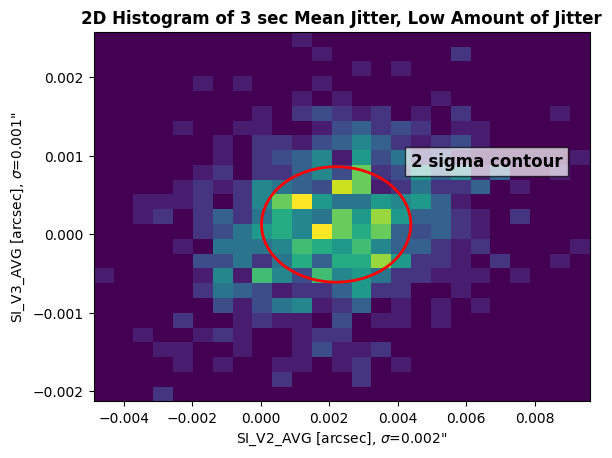

In [28]:
low_jit = datapath / "le2t09010_jit.fits"
plot_jitter(low_jit, "Low Amount of Jitter")

The plot above is a 2D histogram of the mean jitter at `V2` and `V3`. An ellipse is plotted on top of the histogram to visualize two standard deviations from the mean contour. On the `X` and `Y` axes is the standard deviation value for `SI_V2_AVG` and `SI_V3_AVG`. Ideally, since the throughput of the target's flux begins to decrease around `0.4"` off the center of the aperture (see [Chapter 8.8](https://hst-docs.stsci.edu/cosihb/chapter-8-target-acquisitions/8-8-centering-accuracy-and-data-quality) of the COS Instrument Handbook), the Root-Sum-Square (RSS) of the data should be less than `0.4"`. The RSS is a statistical measure of uncertainty to combine multiple measurements of uncertainty. It can be calculated with the equation:

$ \text{RSS} = \sqrt{\sigma_X^2 + \sigma_Y^2} $

Let's calculate the RSS of the low jitter dataset:

In [29]:
v2_stdev, v3_stdev = plot_jitter(low_jit, rss=True)

rss_low = np.sqrt(v2_stdev**2 + v3_stdev**2)

print(f"The Root-Sum-Square of the low jitter dataset is {np.round(rss_low, 3)}\"")

The Root-Sum-Square of the low jitter dataset is 0.0020000000949949026"


As we can see, the RSS of the low jitter dataset was `0.002"`, well within the `0.4"` centering quality limit.

Let's take a look at the high jitter dataset:

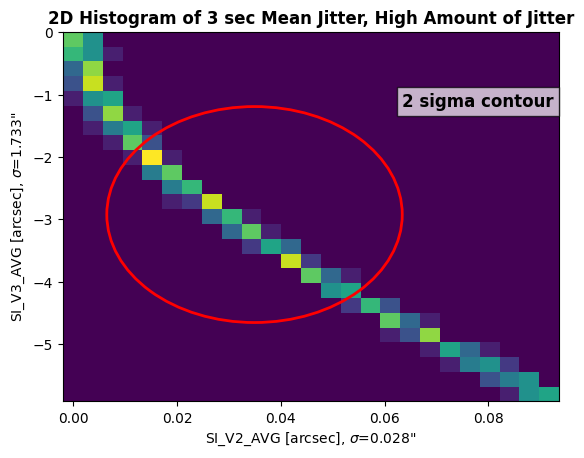

In [30]:
high_jit = datapath / "le3a01010_jit.fits"

plot_jitter(high_jit, "High Amount of Jitter")

We can see that this dataset looks *very* different than the low jitter dataset. The spread of the jitter is much greater than our previous example, especially for `SI_V3_AVG`. We are seeing a large contour, indicating a big spread in jitter values throughout the observation. Let's calculate the RSS of this data:

In [31]:
v2_stdev, v3_stdev = plot_jitter(high_jit, rss=True)

rss_high = np.sqrt(v2_stdev**2 + v3_stdev**2)

print(f"The Root-Sum-Square of the high jitter dataset is {np.round(rss_high, 3)}\"")

The Root-Sum-Square of the high jitter dataset is 1.7339999675750732"


This observation's RSS of the jitter values is `1.734"`, indicating that the target may have gone off center during the course of the observation. In this instance, the user should check for large variations in the count rate throughout the observation (assuming the target is not variable). A tutorial notebook for creating lightcurves with COS data can be found [here](https://github.com/spacetelescope/hst_notebooks/blob/main/notebooks/COS/SplitTag/SplitTag.ipynb).

# Congrats on completing the notebook!

### There are more tutorial notebooks for COS in [this](https://github.com/spacetelescope/hst_notebooks/tree/main/notebooks/COS) repo, check them out!

## About this Notebook
**Author:** Sierra Gomez (sigomez@stsci.edu)

**Updated on:** August 29, 2024

*This tutorial was generated to be in compliance with the [STScI style guides](https://github.com/spacetelescope/style-guides) and would like to cite the [Jupyter guide](https://github.com/spacetelescope/style-guides/blob/master/templates/example_notebook.ipynb) in particular.*

## Citations

If you use `astropy`, `astroquery`, or `matplotlib`, `numpy` for published research, please cite the authors. Follow these links for more information about citations:

* [Citing `astropy`](https://docs.astropy.org/en/stable/index.html)

* [Citing `astroquery`](https://astroquery.readthedocs.io/en/latest/)

* [Citing `matplotlib`](https://matplotlib.org/stable/users/project/citing.html)

* [Citing `numpy`](https://numpy.org/citing-numpy/)